In [1]:
import os
import glob

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "Times New Roman",  # Set font to Times New Roman
    # "font.size": 10,  # Adjust font size as needed
    # "axes.labelsize": 12,  # Axis labels
    # "xtick.labelsize": 10,  # X-axis tick labels
    # "ytick.labelsize": 10,  # Y-axis tick labels
    # "legend.fontsize": 10   # Legend text
})

directory = "ingo"

all_files = glob.glob(os.path.join(directory, '**', '*.csv'), recursive=True)
csv_files = [f for f in all_files if 'queue' not in os.path.basename(f)]

In [2]:
csv_files.sort()
csv_files = [filename.replace("\\", "/") for filename in csv_files]

In [3]:
import pandas as pd

experiments = {}
experiments['colight'] = {}
experiments['dqn'] = {}
experiments['mplight'] = {}
experiments['fixedtime'] = {}
experiments['maxpressure'] = {}

for filename in csv_files:
    model_name = filename.split("/")[1]
    experiment_name = filename.split("/")[-1].rstrip(".csv")
    dqn_df = pd.read_csv(filename)
    experiments[model_name][experiment_name] = dqn_df
    

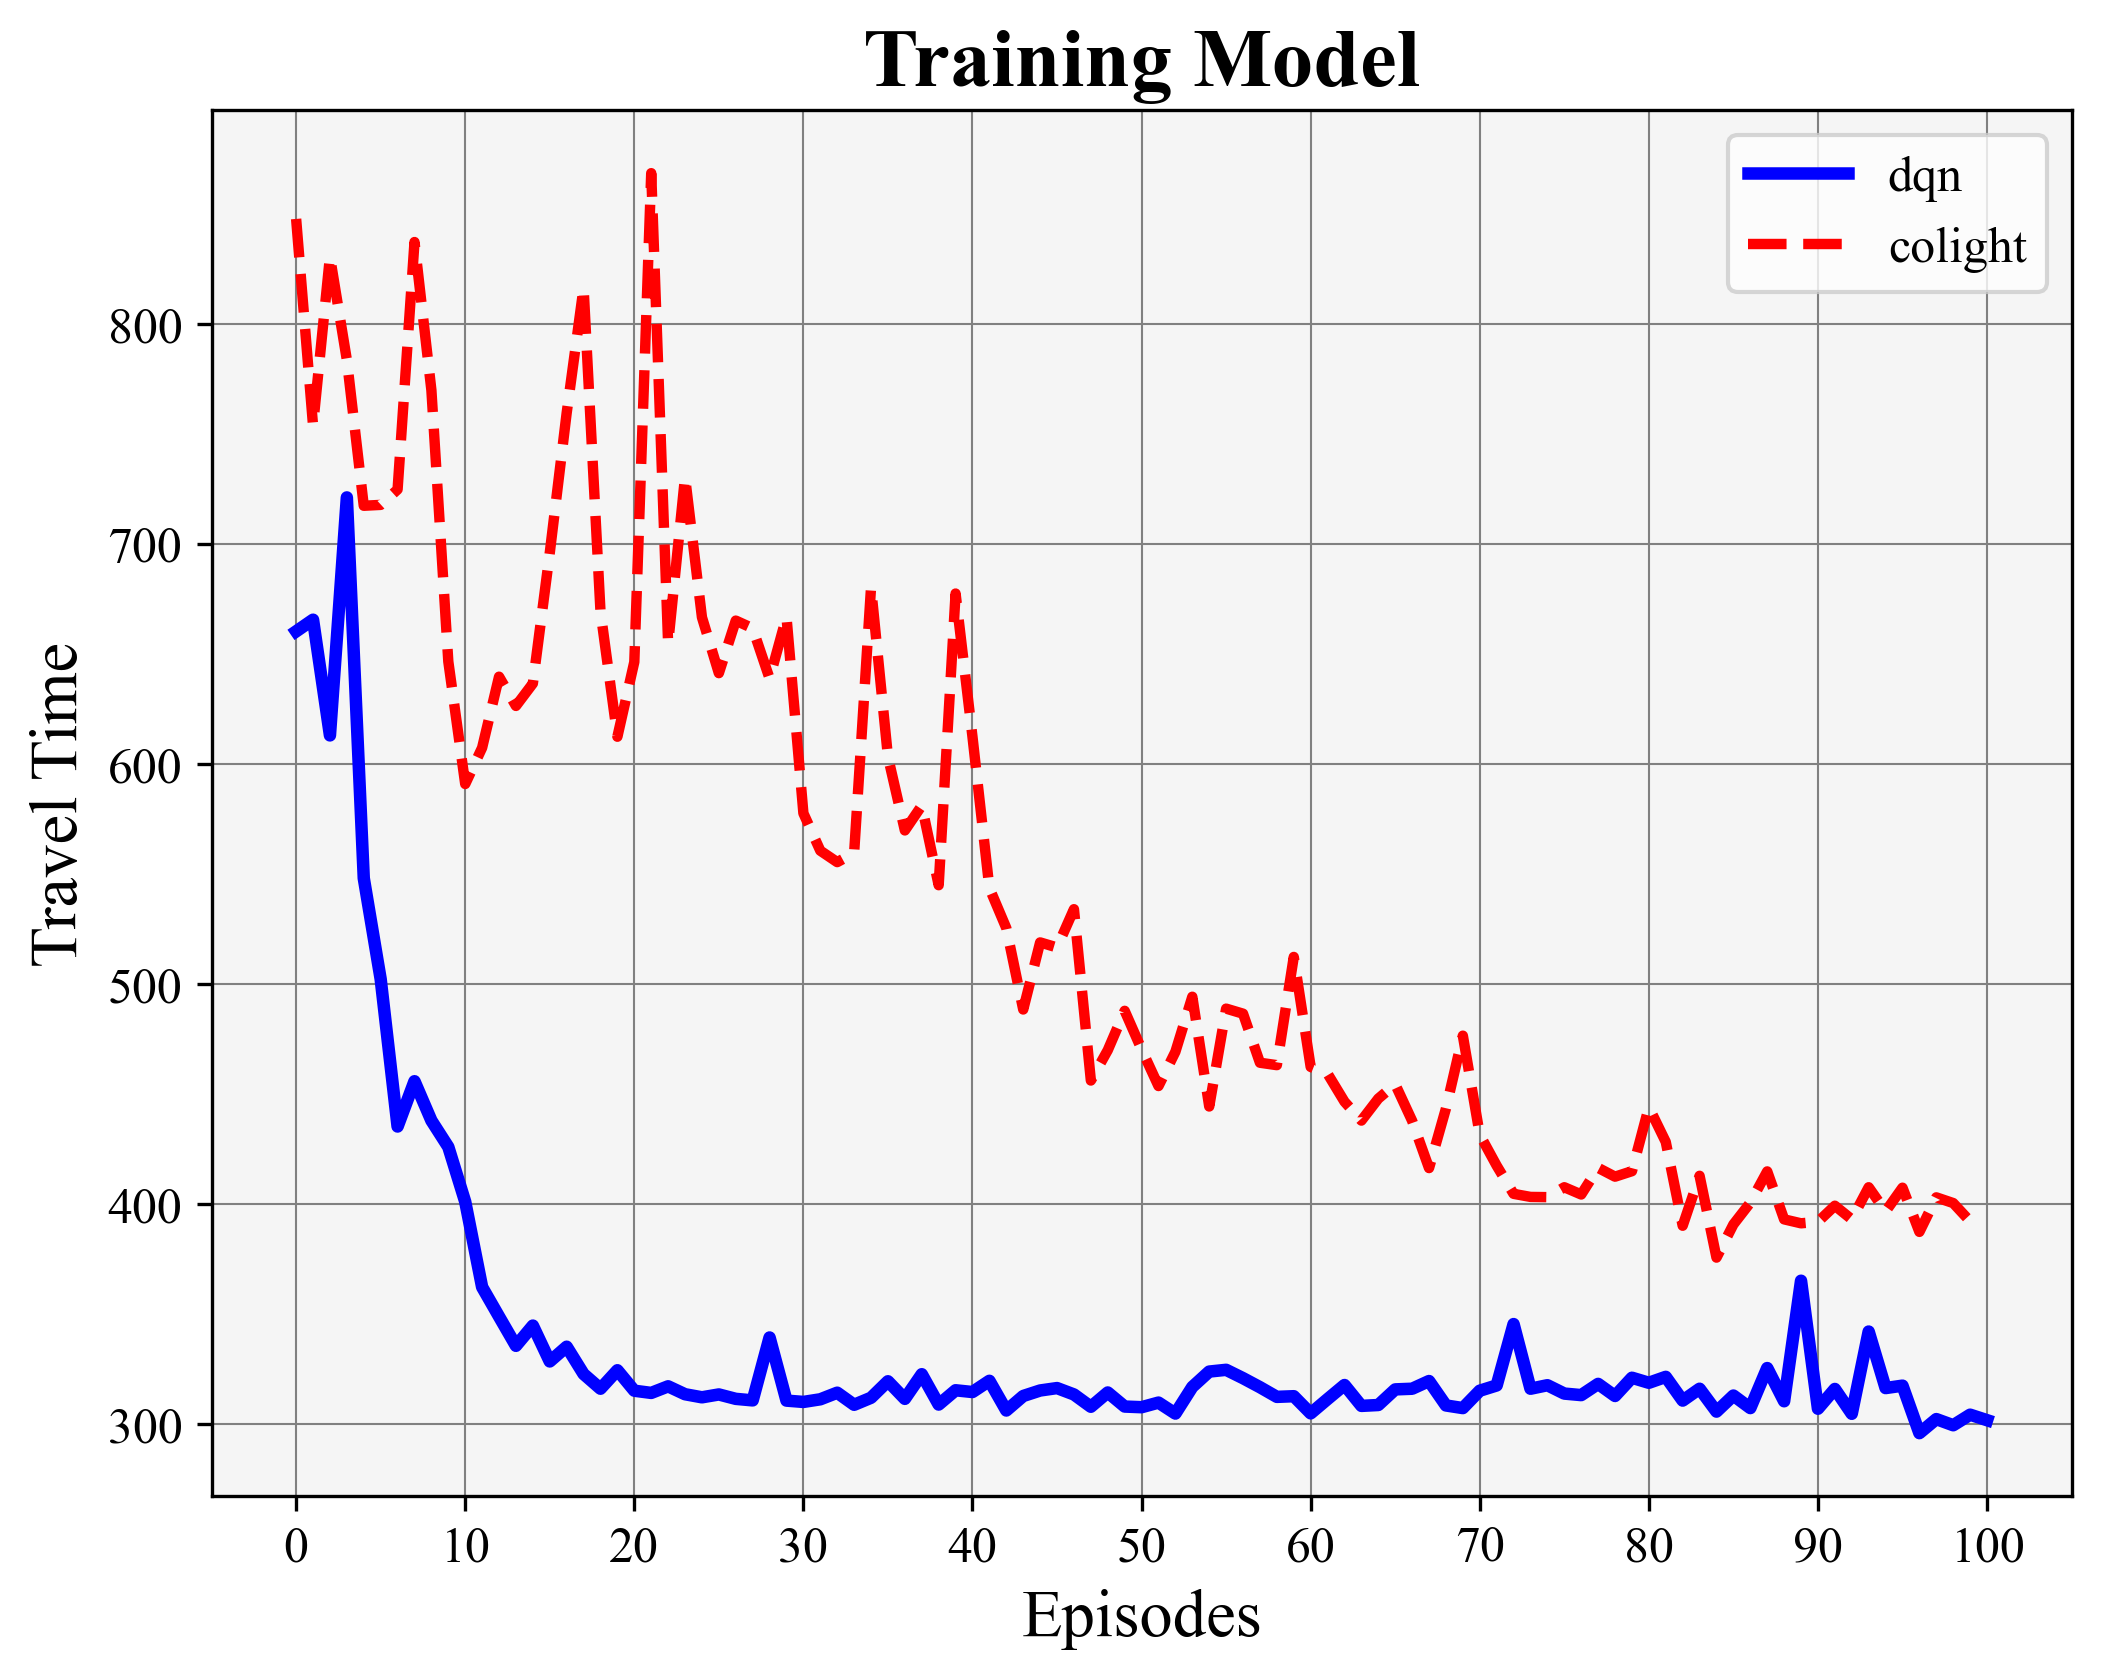

In [4]:
import matplotlib.pyplot as plt

dqn_df = experiments['dqn']['train_morning']
colight_df = experiments['colight']['train_morning']


plt.figure(figsize=(8, 6))
plt.plot(dqn_df['episode'], dqn_df['travel_time'], label='dqn', color='blue', linestyle='-', linewidth=3)
plt.plot(colight_df['episode'], colight_df['travel_time'], label='colight', color='red', linestyle='--', linewidth=2.5)
# plt.plot(mplight_df['episode'], mplight_df['travel_time'], label='mplight', color='green', linestyle='-', linewidth=1.5)
plt.title(f'Training Model', fontweight='bold', fontsize=20)
plt.xlabel("Episodes", fontsize=16)
plt.ylabel('Travel Time', fontsize=16)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(range(0,101,10), fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('whitesmoke')

plt.show()


In [5]:
experiments['colight']['train_morning']

,model_name,mode,episode,travel_time,q_loss,reward,queue,delay,throughoutput
0,colight,TRAIN,0,847.8,1.9,-717.43,13.60,0.23,5093
1,colight,TRAIN,1,753.9,1.9,-740.81,13.85,0.24,5240
2,colight,TRAIN,2,830.7,1.8,-707.10,14.10,0.24,3801
3,colight,TRAIN,3,783.7,1.7,-714.39,13.96,0.24,3878
4,colight,TRAIN,4,717.4,2.2,-722.29,14.08,0.24,3521
...,...,...,...,...,...,...,...,...,...
95,colight,TRAIN,95,407.4,0.5,-334.78,6.77,0.16,8258
96,colight,TRAIN,96,387.3,0.4,-370.02,7.37,0.16,7967
97,colight,TRAIN,97,403.0,0.4,-366.84,7.35,0.17,7935
98,colight,TRAIN,98,400.4,0.4,-351.32,7.09,0.16,8156


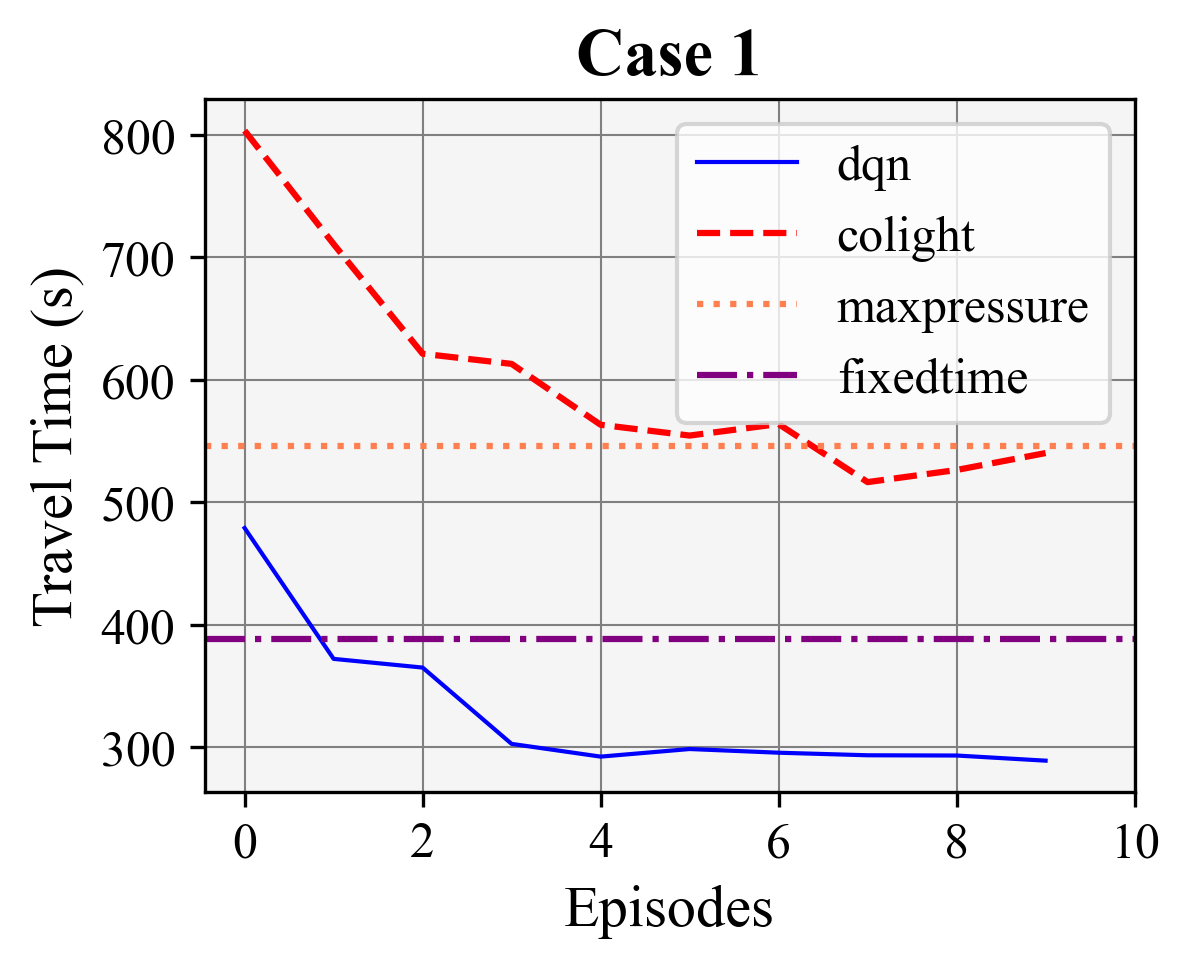

In [6]:
case_name = 'ingo_morning'
case_title = 'Case 1'

dqn_df = experiments['dqn'][case_name]
colight_df = experiments['colight'][case_name]
fixedtime_df = experiments['fixedtime'][case_name]
max_df = experiments['maxpressure'][case_name]


plt.figure(figsize=(4, 3))
plt.plot(dqn_df['episode'], dqn_df['travel_time'], label='dqn', color='blue', linestyle='-', linewidth=1.0)
plt.plot(colight_df['episode'], colight_df['travel_time'], label='colight', color='red', linestyle='--', linewidth=1.5)
plt.axhline(y=float(max_df['travel_time'].iloc[0]), label='maxpressure', color='coral', linestyle=':', linewidth=1.5)
plt.axhline(y=float(fixedtime_df['travel_time'].iloc[0]), label='fixedtime', color='purple', linestyle='-.', linewidth=1.5)
plt.title(case_title, fontweight='bold', fontsize=16)
plt.xlabel("Episodes", fontsize=14)
plt.ylabel('Travel Time (s)', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(range(0,11,2), fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('whitesmoke')

plt.savefig('case\ingo\case1.pdf', bbox_inches='tight')

plt.show()

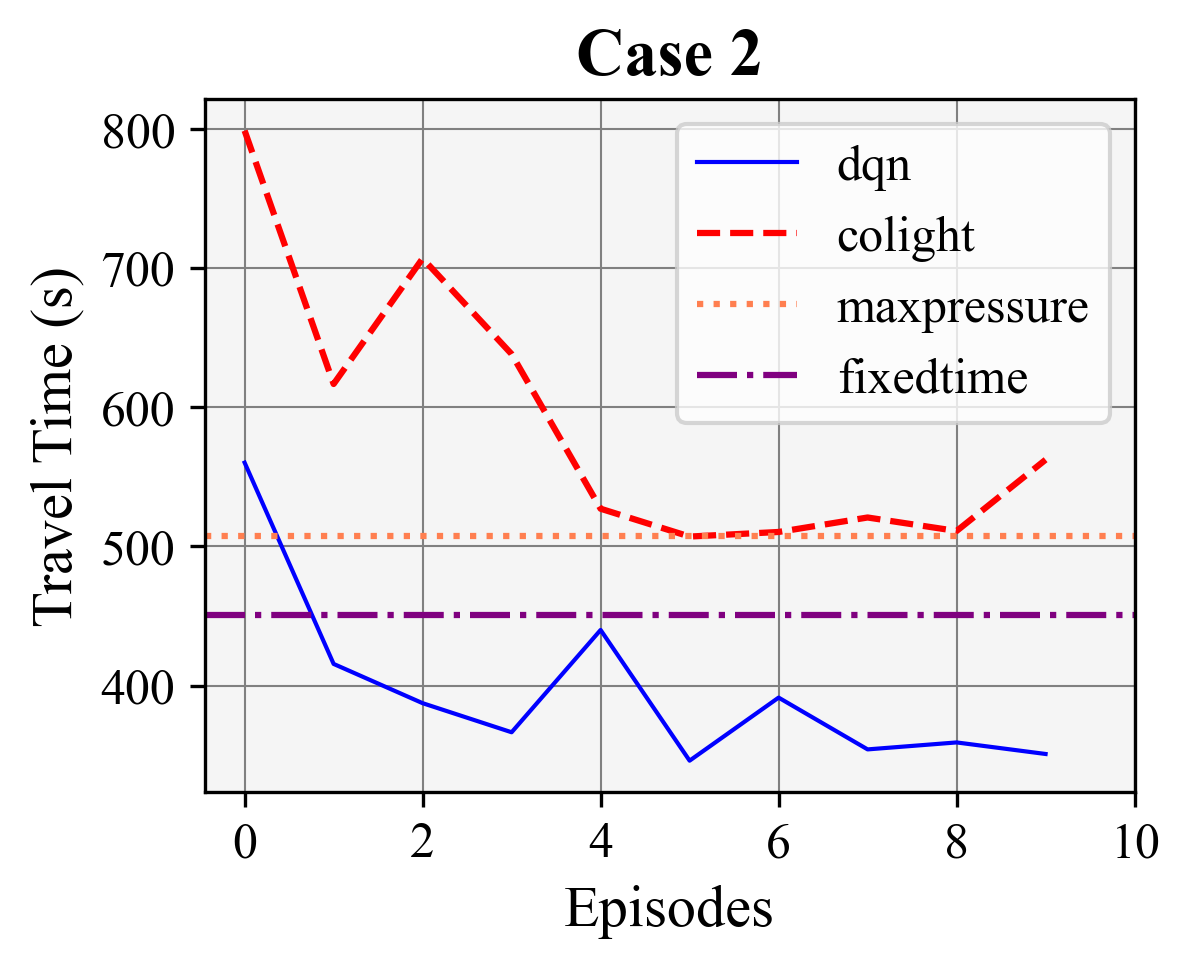

In [7]:
case_name = 'ingo_noon'
case_title = 'Case 2'

dqn_df = experiments['dqn'][case_name]
colight_df = experiments['colight'][case_name]
fixedtime_df = experiments['fixedtime'][case_name]
max_df = experiments['maxpressure'][case_name]


plt.figure(figsize=(4, 3))
plt.plot(dqn_df['episode'], dqn_df['travel_time'], label='dqn', color='blue', linestyle='-', linewidth=1.0)
plt.plot(colight_df['episode'], colight_df['travel_time'], label='colight', color='red', linestyle='--', linewidth=1.5)
plt.axhline(y=float(max_df['travel_time'].iloc[0]), label='maxpressure', color='coral', linestyle=':', linewidth=1.5)
plt.axhline(y=float(fixedtime_df['travel_time'].iloc[0]), label='fixedtime', color='purple', linestyle='-.', linewidth=1.5)
plt.title(case_title, fontweight='bold', fontsize=16)
plt.xlabel("Episodes", fontsize=14)
plt.ylabel('Travel Time (s)', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(range(0,11,2), fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('whitesmoke')

plt.savefig('case\ingo\case2.pdf', bbox_inches='tight')

plt.show()

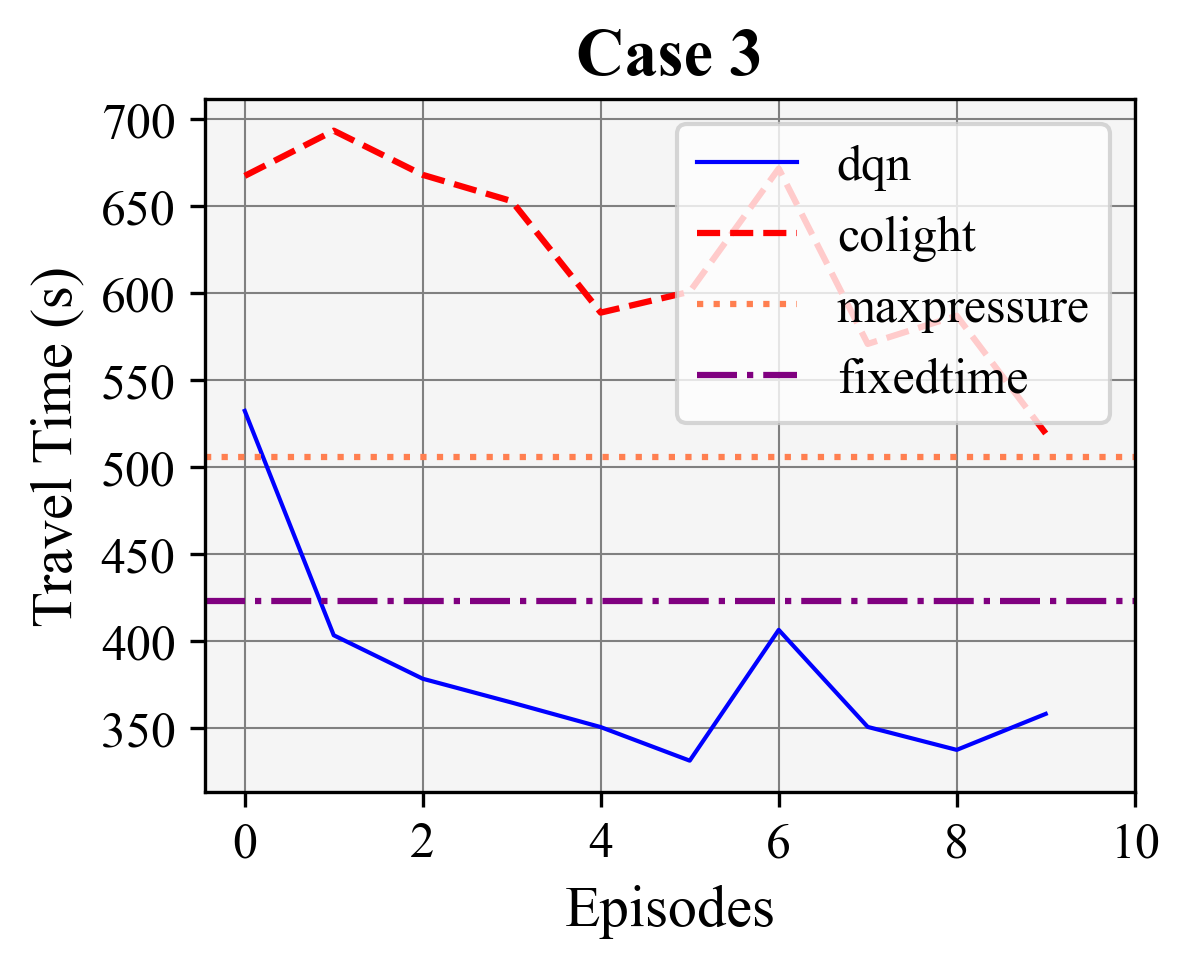

In [8]:
case_name = 'ingo_evening'
case_title = 'Case 3'

dqn_df = experiments['dqn'][case_name]
colight_df = experiments['colight'][case_name]
fixedtime_df = experiments['fixedtime'][case_name]
max_df = experiments['maxpressure'][case_name]


plt.figure(figsize=(4, 3))
plt.plot(dqn_df['episode'], dqn_df['travel_time'], label='dqn', color='blue', linestyle='-', linewidth=1.0)
plt.plot(colight_df['episode'], colight_df['travel_time'], label='colight', color='red', linestyle='--', linewidth=1.5)
plt.axhline(y=float(max_df['travel_time'].iloc[0]), label='maxpressure', color='coral', linestyle=':', linewidth=1.5)
plt.axhline(y=float(fixedtime_df['travel_time'].iloc[0]), label='fixedtime', color='purple', linestyle='-.', linewidth=1.5)
plt.title(case_title, fontweight='bold', fontsize=16)
plt.xlabel("Episodes", fontsize=14)
plt.ylabel('Travel Time (s)', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(range(0,11,2), fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('whitesmoke')

plt.savefig('case\ingo\case3.pdf', bbox_inches='tight')

plt.show()

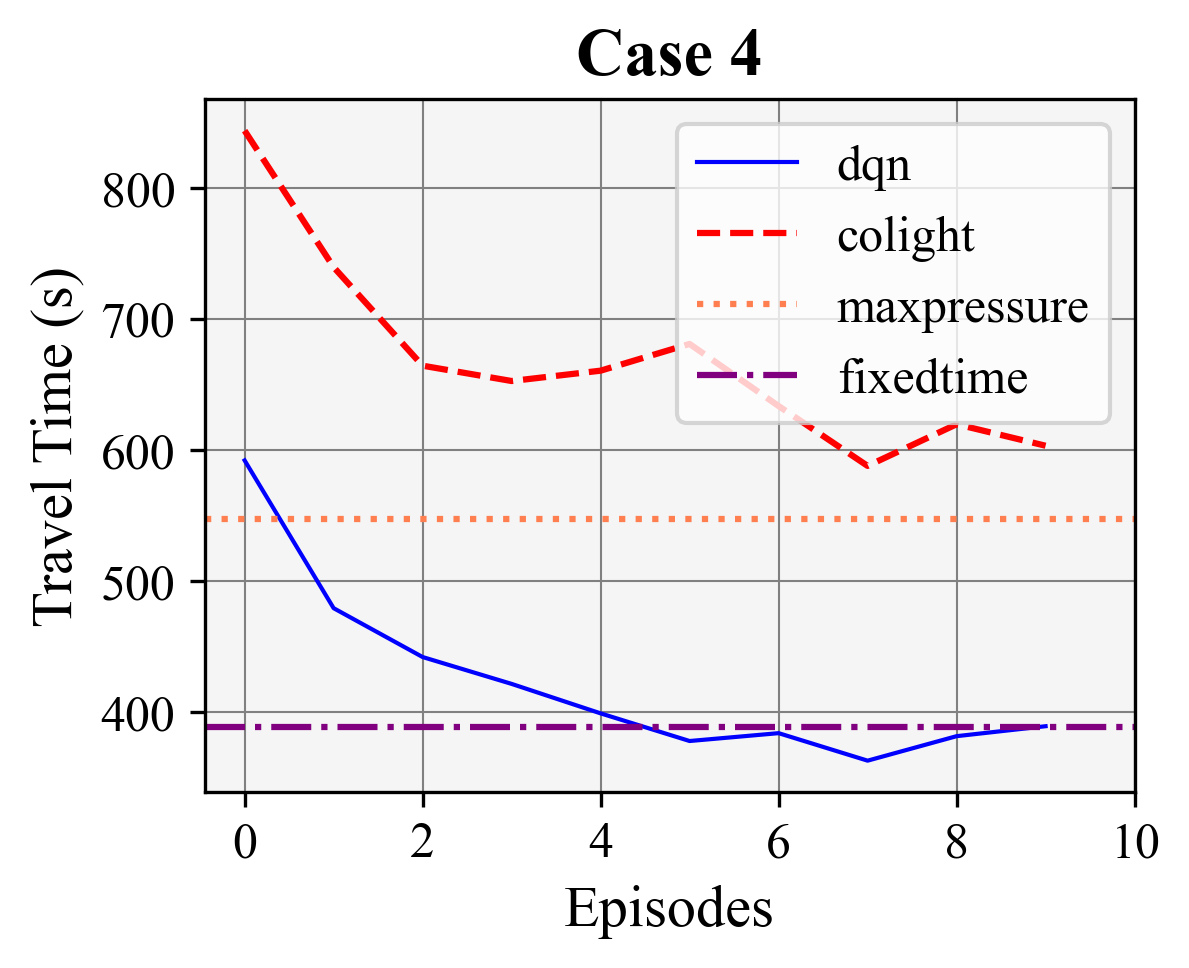

In [9]:
case_name = 'ingo_sensor'
case_title = 'Case 4'

dqn_df = experiments['dqn'][case_name]
colight_df = experiments['colight'][case_name]
fixedtime_df = experiments['fixedtime']['ingo_morning']
max_df = experiments['maxpressure'][case_name]


plt.figure(figsize=(4, 3))
plt.plot(dqn_df['episode'], dqn_df['travel_time'], label='dqn', color='blue', linestyle='-', linewidth=1.0)
plt.plot(colight_df['episode'], colight_df['travel_time'], label='colight', color='red', linestyle='--', linewidth=1.5)
plt.axhline(y=float(max_df['travel_time'].iloc[0]), label='maxpressure', color='coral', linestyle=':', linewidth=1.5)
plt.axhline(y=float(fixedtime_df['travel_time'].iloc[0]), label='fixedtime', color='purple', linestyle='-.', linewidth=1.5)
plt.title(case_title, fontweight='bold', fontsize=16)
plt.xlabel("Episodes", fontsize=14)
plt.ylabel('Travel Time (s)', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(range(0,11,2), fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('whitesmoke')

plt.savefig('case\ingo\case4.pdf', bbox_inches='tight')

plt.show()